#### “Design a food delivery system like Swiggy”

- requirements → architecture → scaling → failures.

1️⃣ REQUIREMENTS

Functional requirements
- Users browse restaurants & menus
- Users place orders
- Track order status
- Assign delivery partners

Non-functional requirements
- High availability
- Low latency
- Scalable to millions of users
- Fault tolerant

2️⃣ HIGH-LEVEL ARCHITECTURE
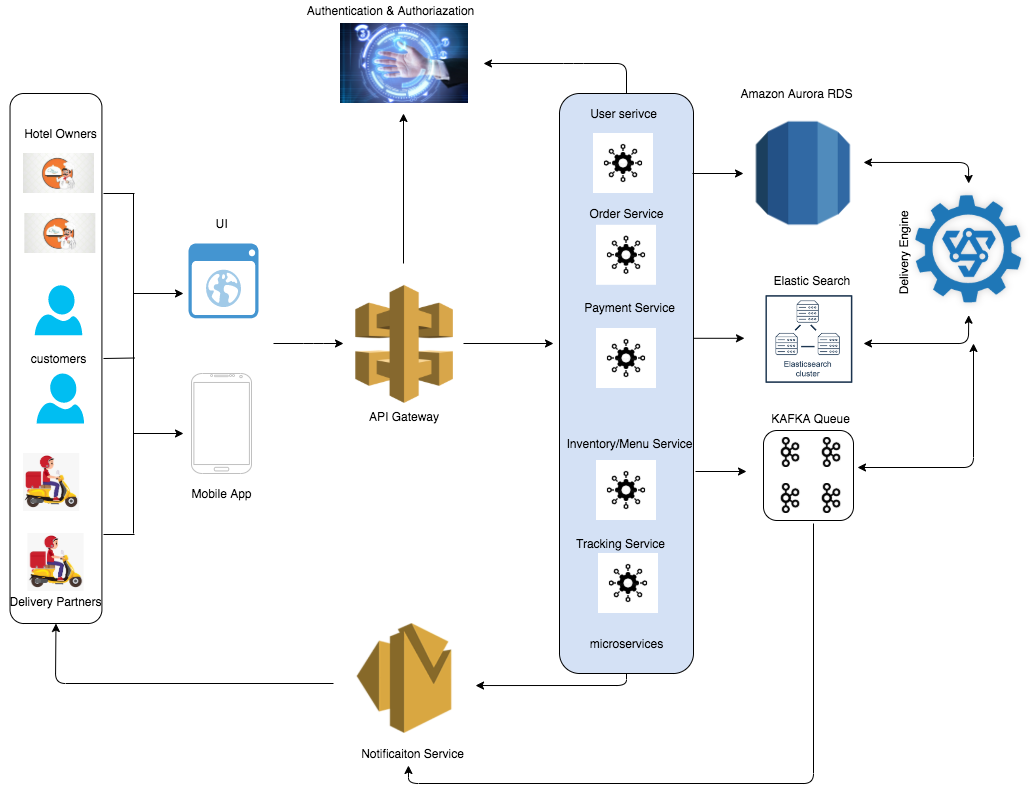
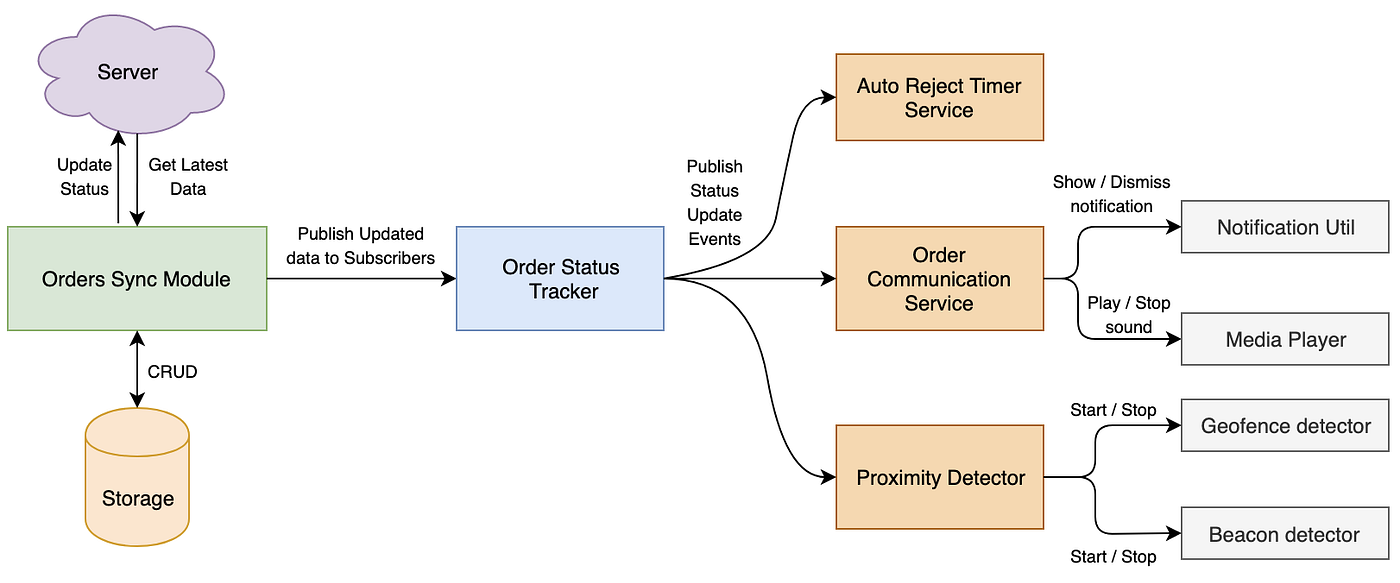

Components
- API servers
- Load balancer
- Cache
- Database
- Message queue
- Background workers

3️⃣ API LAYER
- Stateless backend servers
- All state stored in DB / cache
- Requests distributed via load balancer

Why stateless?
- So any server can handle any request.

#### 4️⃣ DATABASE DESIGN
Core tables
- users
- restaurants
- food_items
- orders
- order_items
- delivery_partners

Relationships
- One user → many orders
- One order → many food items
- One restaurant → many food items

5️⃣ DATABASE PERFORMANCE

Indexing strategy
- Primary key index on order_id
- Composite index on (user_id, created_at)
- Index on status for analytics

Pagination
- Use LIMIT + OFFSET for order history

Scaling DB
- Read replicas for heavy reads
- Partition orders table for large scale

6️⃣ CACHE LAYER
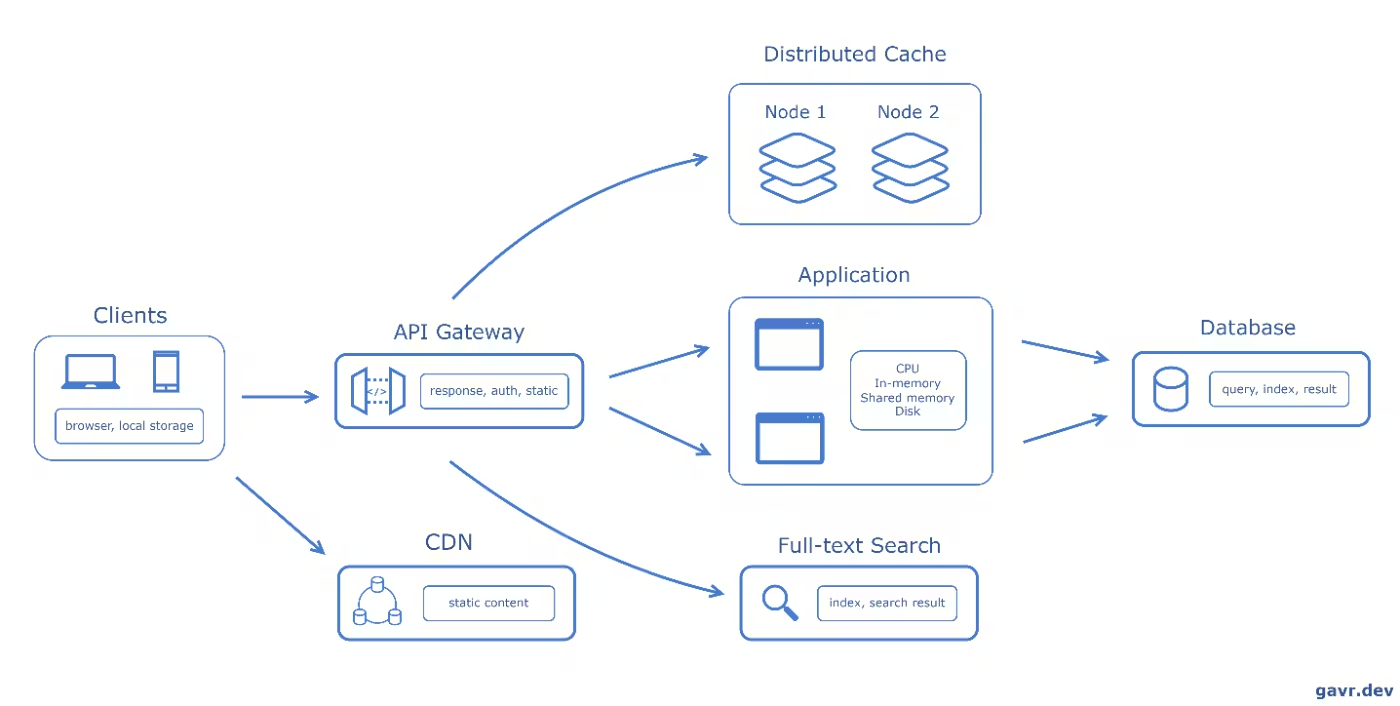
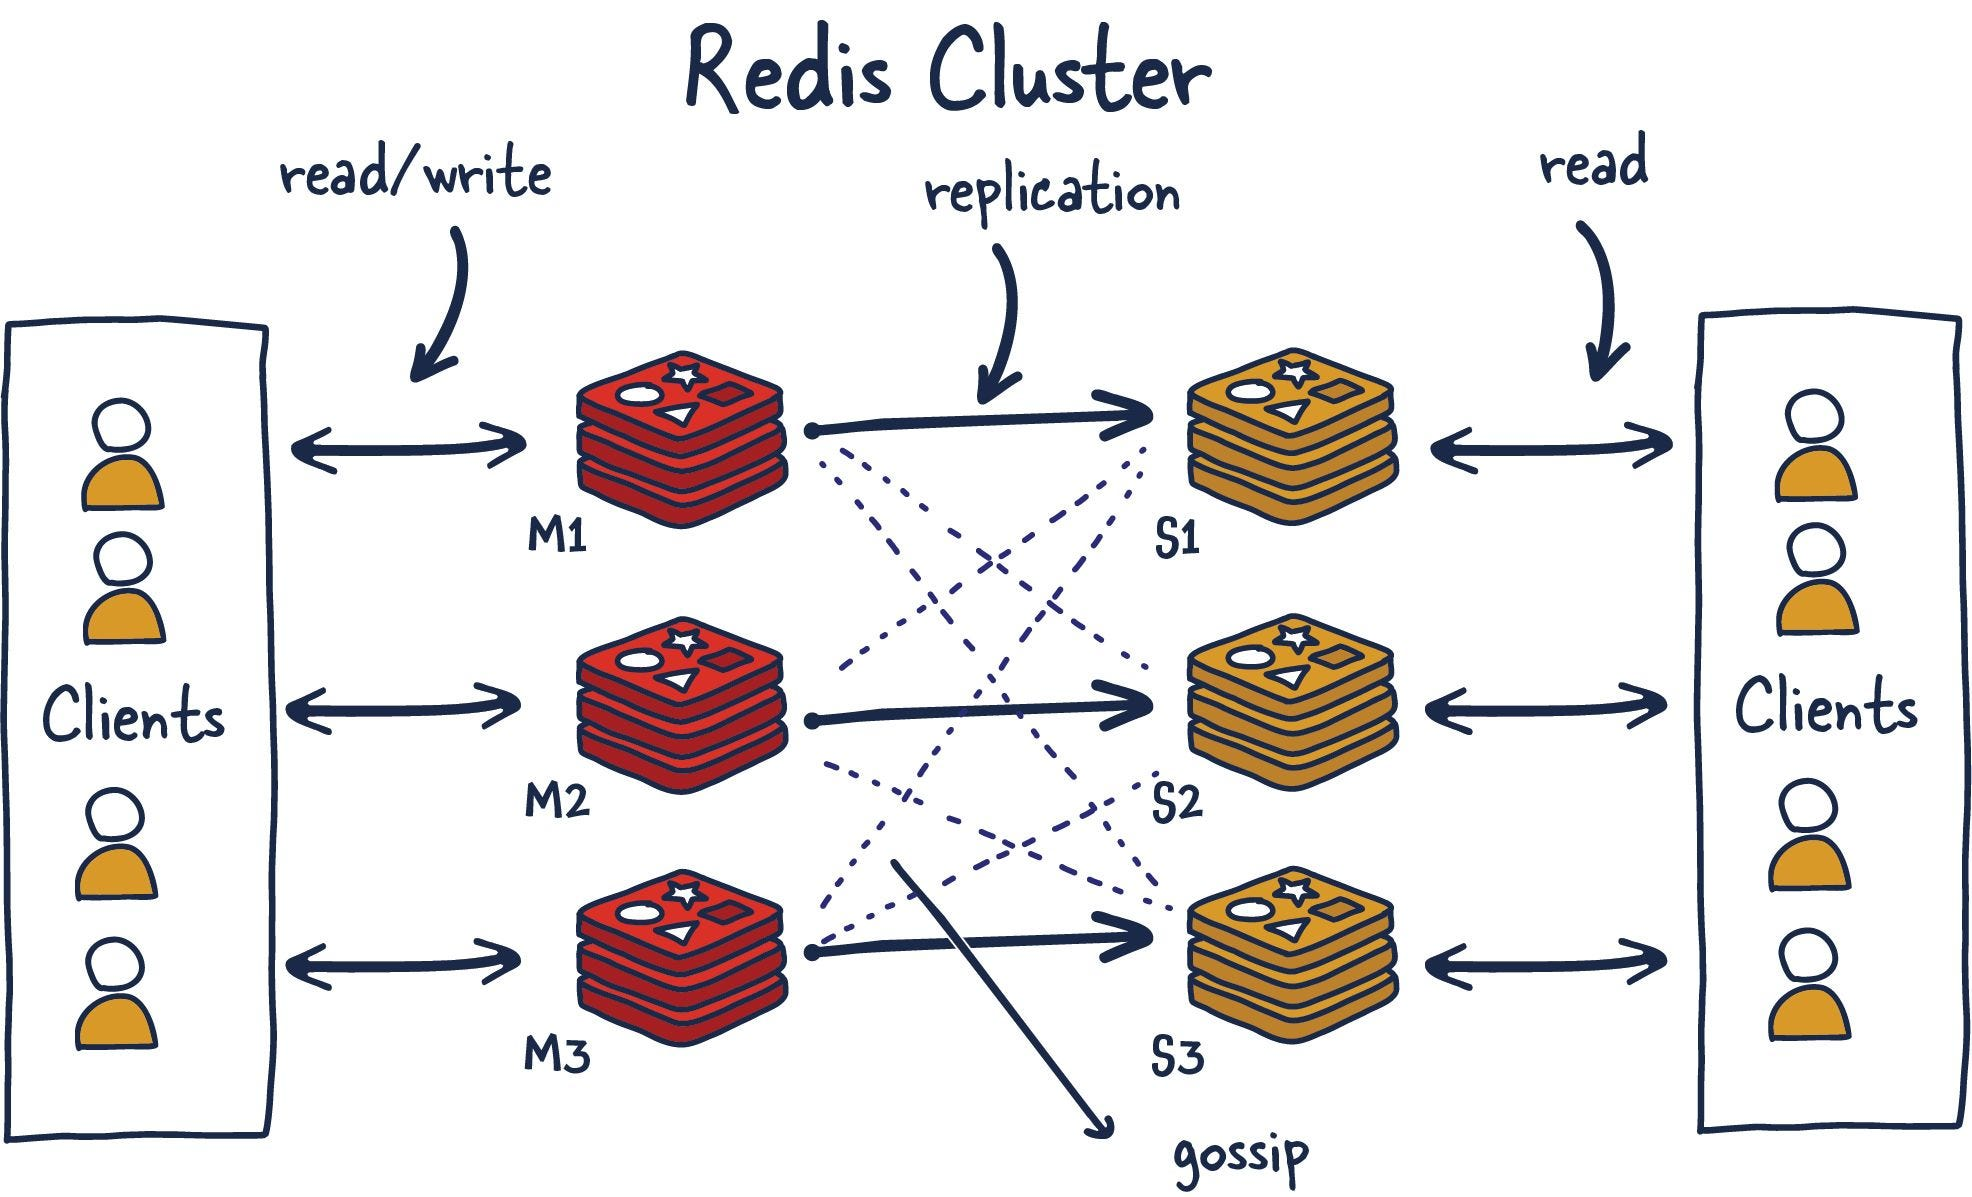

What is cached?
- Restaurant menus
- Frequently accessed data

Benefit
- Reduced DB load
- Faster response

7️⃣ ORDER FLOW (MOST IMPORTANT)

Step-by-step
- User places order
- API validates & rate limits
- Order saved to DB
- Order pushed to message queue
- Worker processes order
- Delivery partner assigned
- Order delivered

8️⃣ MESSAGE QUEUE (ASYNC PROCESSING)
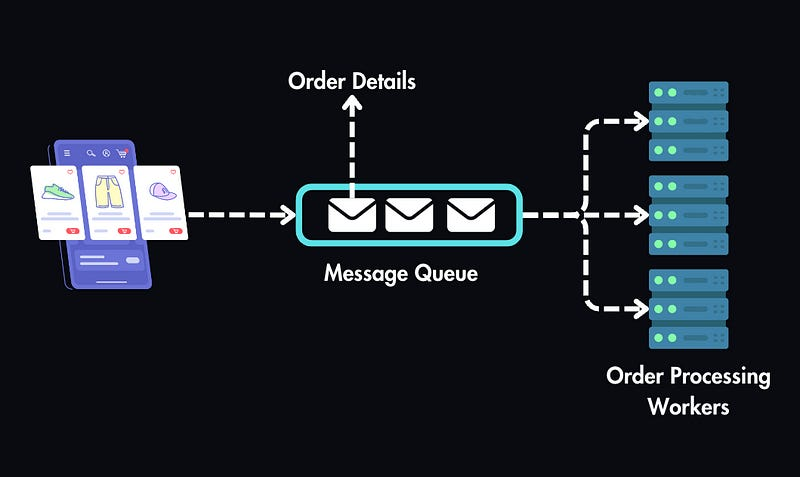
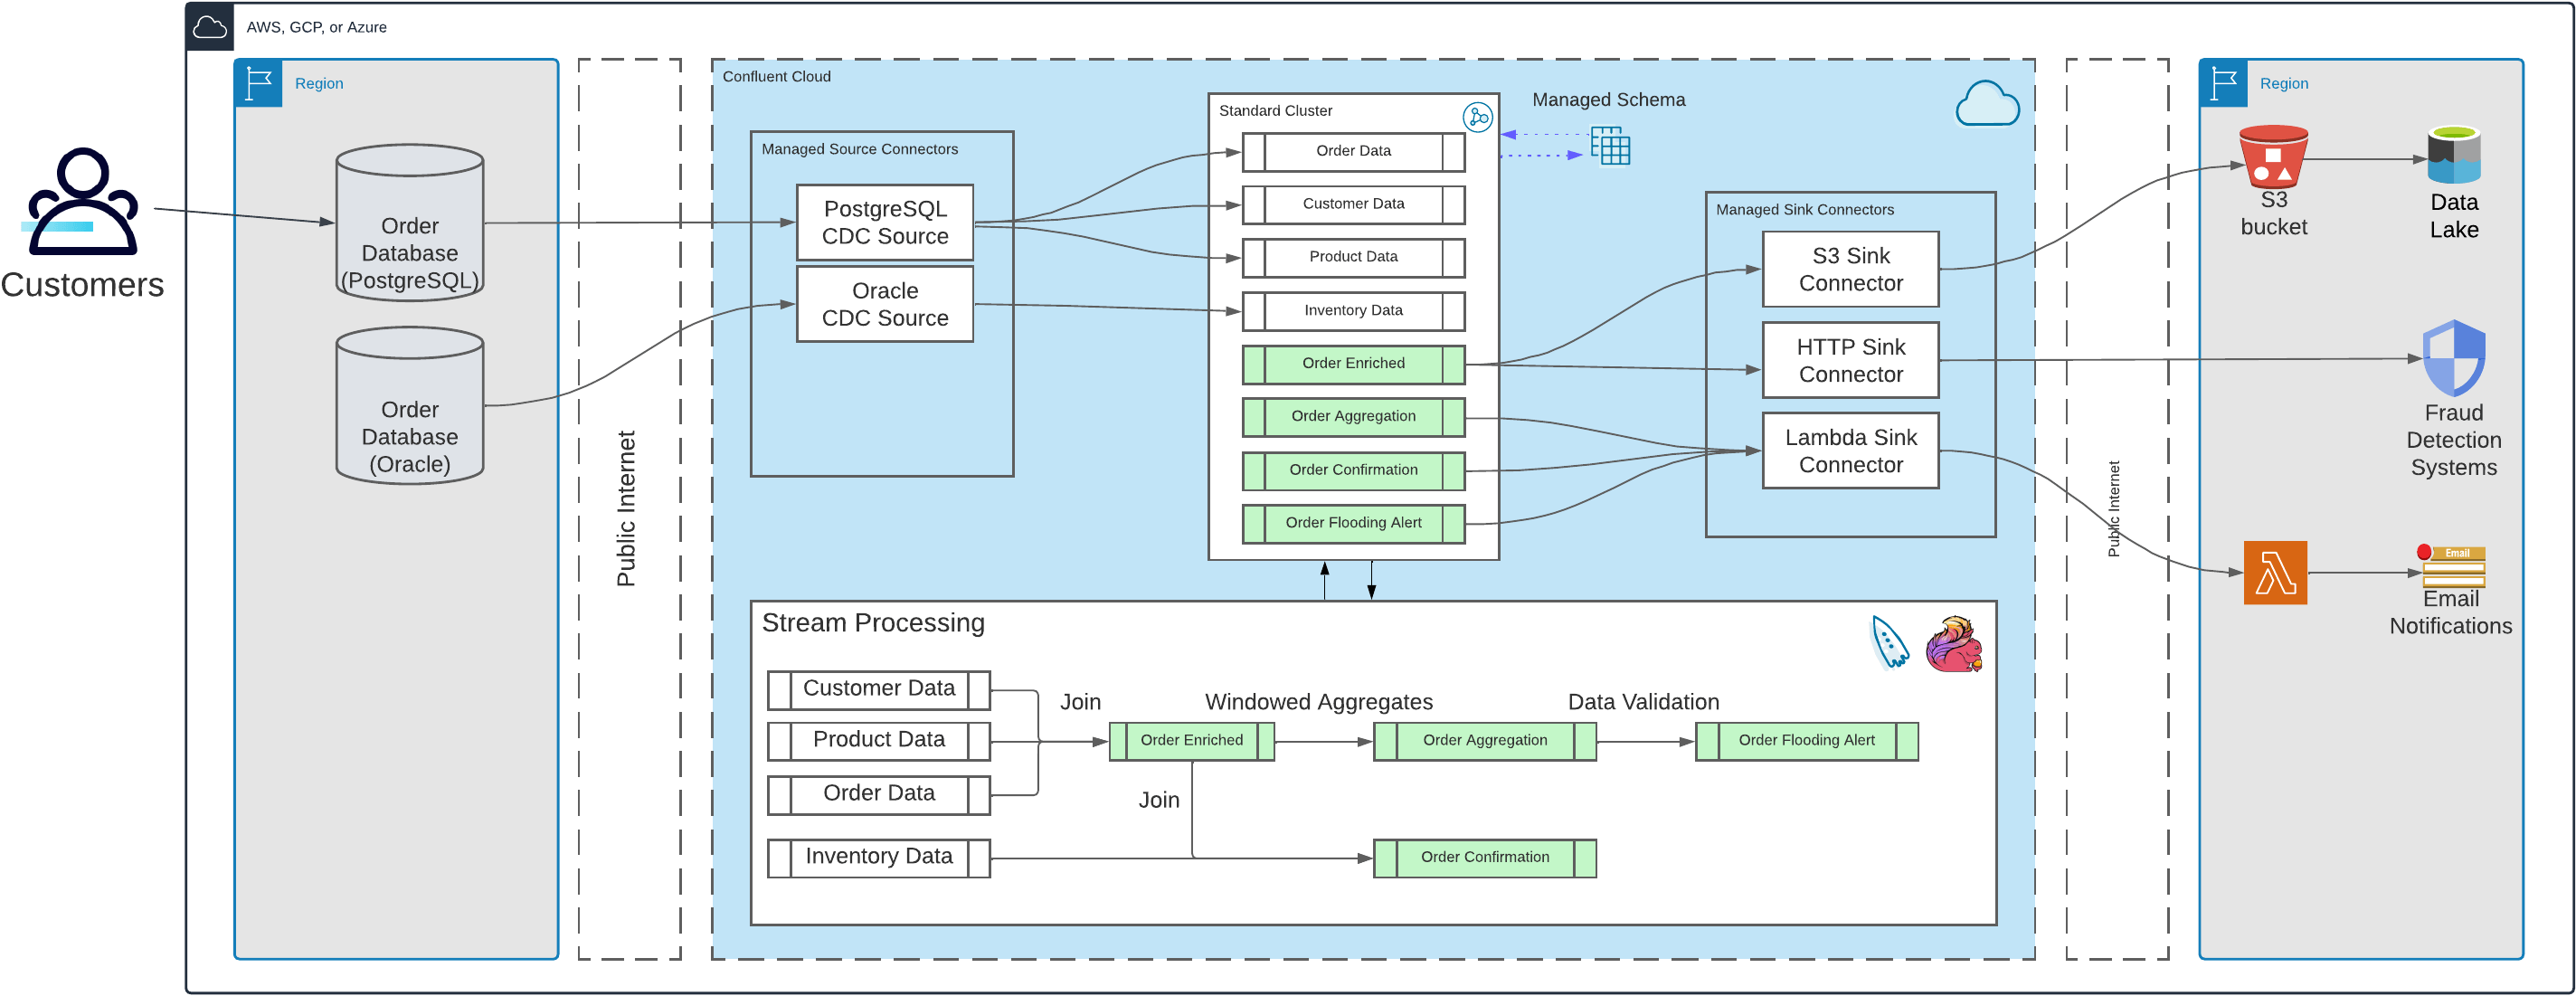

Why queue?
- Handle traffic spikes
- Decouple order creation from processing

Example uses
- Order confirmation
- Notifications
- Delivery assignment

9️⃣ LOAD BALANCING
- Incoming traffic goes through load balancer
- Requests distributed across multiple API servers
- Round-robin or least-connection strategy

🔟 RATE LIMITING

Purpose
- Prevent abuse
- Protect backend

Strategy
- Sliding window or token bucket
- Limit requests per user per time window

1️⃣1️⃣ FAILURE HANDLING

Techniques
- Retry with limit for transient failures
- Dead Letter Queue for permanent failures
- Idempotency keys to avoid duplicates